k 50
k 100
k 150
k 200
k 250
k 300
k 350
k 400
k 450
k 500
j 50
j 100
j 150
j 200
j 250
j 300
j 350
j 400
j 450
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
DETERMINANTS


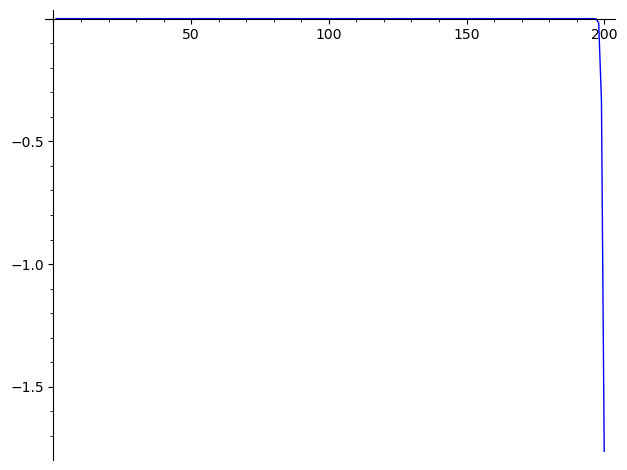

LOGSARITHMS OF DETERMINANTS


ValueError: Axis limits cannot be NaN or Inf

In [7]:
import pickle
from sage.all import sigma, nth_prime, matrix, flatten, QQ
import ast
import time

start=time.time()
precision_bits=100
def tau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def tau_prime(k):
    pn = nth_prime(k)
    return tau(pn)


tau_prime_list = [] 
for k in range(1, 501):
    if k%50==0:
        print("k",k)
    tau_prime_list.append([k, tau_prime(k)])
    
c = 0
h_list = [[0, 1]] + tau_prime_list 
j_list = [(0, c)]
for n in range(1,500):
    sm = 0
    for r in range(1, n): 
        sm = sm + j_list[r][1] * h_list[n-r][1] 
    j_n = n * h_list[n][1] - sm
    j_list.append((n, j_n))
    if n%50==0:
        print("j",n)
    
def P_matrix(lst):
    lenlist = len(lst)
    columns = [lst]
    for k in range(1, lenlist):
        column = [0]*(k-1)
        column = column + [-k]
        column = flatten(column + [lst])
        column = column + [lst]
        column = column[:lenlist]
        columns += [column]
    return (matrix(columns)).transpose()

# Create polynomial ring for Lagrange interpolation
R = QQ['x']
CC = ComplexField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable
dets=[]
logs=[]
for n in range(1, 201):
    print(n)
    deformed_j_list=j_list[:n]
    inputs=[pair[1] for pair in deformed_j_list]
    pl=P_matrix(inputs) 
    det=pl.det()
    dets.append((n,det))

abs_dets=[(pair[0],abs(pair[1])) for pair in modified_dets]
for pair in dets:
    if pair[1]>0:
        logs.append((pair[0],log(pair[1])))
    
    
    

p = list_plot(modified_dets, plotjoined=True, axes_labels=['', ''])
print("DETERMINANTS")
p.show()
p = list_plot(logs, plotjoined=True, axes_labels=['', ''])
print("LOGSARITHMS OF DETERMINANTS")
p.show()



with open('/Users/barrybrent/data2/run8feb26no3.txt', 'wb') as wfile:
    pickle.dump(modified_dets, wfile) # ouput snipped


with open('/Users/barrybrent/data2/run8feb26no4.txt', 'wb') as wfile:
    pickle.dump(logs, wfile) # ouput snipped